In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy.io
import sys
import matplotlib.pyplot as plt 
from scipy import signal

In [4]:
HB_BR = []
def EKG_data(X):
    
    EKG_data = scipy.io.loadmat(X)
    samples = EKG_data['val'][0]
    peaks, low = signal.find_peaks(samples, distance=200) # to maintain healthy distance between 2 consecutive 'R'
   
    # thumb rule to find heart beat:
    #no. of 'R' in 10 seconds i.e 10 X no. of peaks upto 1800th value
    xx = [f for f in peaks if f <= 1800] 
    number_of_Rs = len(xx)
    Heart_beat = number_of_Rs * 10
    Breathing_rate = Heart_beat/ 5   # Considering 12-20 breathing rate for 60-100 bpm, using linear correlation
    HB_BR.append((Heart_beat,Breathing_rate))
    
    return HB_BR

In [5]:
import os
import glob
for filepath in glob.glob(os.path.join('/Users/owner/Downloads/af_classification/training201704/','*.mat')):
    EKG_data(filepath)    
    

In [6]:
df_final = pd.DataFrame(HB_BR, columns =['Heart_Rate','Breathing_rate']) 

## I have taken simplistic assumption of linear correlation between Heart beat and Respiratory rate, although it depends on multiple factors.

In [8]:
df_final

,Heart_Rate,Breathing_rate
0,70,14.0
1,60,12.0
2,60,12.0
3,50,10.0
4,60,12.0
5,60,12.0
6,90,18.0
7,80,16.0
8,70,14.0
9,80,16.0


In [9]:
# above is the breathing and heart rate for the 4th sample of the EKG dataset

In [10]:
# Random graph plotting to validate the distance of 200 units, to check the approximate distance between 2 'R's'

In [14]:
EKG_data_random = scipy.io.loadmat('/Users/owner/Downloads/af_classification/training201704/A04775.mat')
random_sample = EKG_data_random['val'][0]




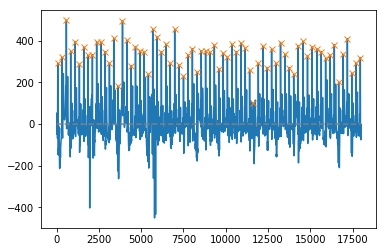

In [15]:
peaks, low = signal.find_peaks(random_sample, distance=200)
plt.plot(random_sample)
plt.plot(peaks, random_sample[peaks], "x")
plt.plot(np.zeros_like(random_sample), "--", color="gray")
plt.show()